# LSTM_Flight_NoFlight

In [1]:
from gensim.models import FastText

model = FastText.load('fasttext_model')
fasttext = model.wv

c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('lstm_train_flight_noflight_1.csv')
data = data[['tokens', 'intent']]

X_data = data['tokens']
y_data = data['intent']

Flight      4662
NoFlight     868
Name: intent, dtype: int64

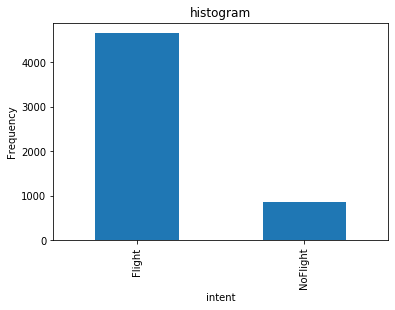

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

pd.value_counts(data['intent']).plot.bar()
plt.title('histogram')
plt.xlabel('intent')
plt.ylabel('Frequency')

data['intent'].value_counts()

In [4]:
from nltk import sent_tokenize, word_tokenize
import bool_intent

tokenized_X = [] # 토큰화한 문장 (단어, 단어, 단어, ...)
for line in X_data :
    tokenized_X.append(word_tokenize(line))

vectored_X = [] # 토큰화한 문장을 벡터로
for sent in tokenized_X :
    vectored_X.append([fasttext[v].tolist() for v in sent])
    
vectored_y = []
for index in y_data : 
    vectored_y.append(bool_intent.intent(index))
    
X = np.array(vectored_X)
y = np.array(vectored_y)

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (5530,)
Shape of y: (5530,)


In [5]:
from keras.preprocessing.sequence import pad_sequences
from keras import backend as k

_dtype = k.floatx()
max_len = 45 # token의 최대 길이
data = pad_sequences(X, maxlen = max_len, dtype = _dtype)

Using TensorFlow backend.


In [6]:
max_len

45

In [7]:
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)

In [8]:
X_train = data[ : n_of_train]
y_train = y[ : n_of_train]
X_test = data[n_of_train : ]
y_test = y[n_of_train : ]

# RNN 학습시키는 부분

In [9]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(LSTM(30, activation='tanh'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 42, epochs = 20, validation_split = 0.2)
# batch_size는 한 번에 학습하는 데이터의 개수

print(model.summary())

W1114 12:17:35.308280 15764 deprecation_wrapper.py:119] From c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1114 12:17:36.605023 15764 deprecation_wrapper.py:119] From c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1114 12:17:36.652005 15764 deprecation_wrapper.py:119] From c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1114 12:17:36.661968 15764 deprecation_wrapper.py:119] From c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.r

Train on 3539 samples, validate on 885 samples
Epoch 1/20
3539/3539 [==============================] - 7s 2ms/step - loss: 0.3322 - acc: 0.8630 - val_loss: 0.1606 - val_acc: 0.9401
Epoch 2/20
3539/3539 [==============================] - 5s 1ms/step - loss: 0.1136 - acc: 0.9587 - val_loss: 0.0823 - val_acc: 0.9706
Epoch 3/20
3539/3539 [==============================] - 5s 1ms/step - loss: 0.0598 - acc: 0.9797 - val_loss: 0.0691 - val_acc: 0.9718
Epoch 4/20
3539/3539 [==============================] - 5s 1ms/step - loss: 0.0454 - acc: 0.9850 - val_loss: 0.0843 - val_acc: 0.9638
Epoch 5/20
3539/3539 [==============================] - 5s 1ms/step - loss: 0.0473 - acc: 0.9836 - val_loss: 0.0571 - val_acc: 0.9740
Epoch 6/20
3539/3539 [==============================] - 5s 1ms/step - loss: 0.0327 - acc: 0.9907 - val_loss: 0.0731 - val_acc: 0.9740
Epoch 7/20
3539/3539 [==============================] - 5s 1ms/step - loss: 0.0305 - acc: 0.9910 - val_loss: 0.0551 - val_acc: 0.9751
Epoch 8/20
3539

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_true = y_test
y_pred = model.predict_classes(X_test, verbose = 0)

print(classification_report(y_true, y_pred, target_names = ['Flight', 'NoFlight']))

              precision    recall  f1-score   support

      Flight       0.98      0.99      0.99       955
    NoFlight       0.94      0.90      0.92       151

    accuracy                           0.98      1106
   macro avg       0.96      0.95      0.95      1106
weighted avg       0.98      0.98      0.98      1106



In [11]:
def ans(lst):
    ans = ["Flight", "NoFlight"]
    temp = [[i, lst[i]] for i in range(2)]
    temp.sort(key = lambda x : x[1], reverse = True)

    print(ans[temp[0][0]])

In [12]:
from keras.preprocessing import sequence
from keras import backend as k
_dtype = k.floatx()

def predict(sentence) :
    sentence = sentence
    sentence_token = []
    sentence_token += word_tokenize(sentence)
    
    sentence_vec = []
    sentence_vec.append([fasttext[v] for v in sentence_token])
    
    padd = sequence.pad_sequences(sentence_vec, maxlen = max_len, dtype = _dtype)
    intent = ans(model.predict(padd)[0])
    
    return(intent)

In [13]:
from keras.models import *
from keras.utils import *

model.save('LSTM_model_1.h5')

In [14]:
# 임의 지정한 문장으로 의도 예측 테스트

predict('new york arriving denver') # Flight
predict('what type of aircraft') # NoFlight
predict('all airport') # Noflight
predict('from new york to denver one way fare') # Flight
predict('what ground transportation is available in denver') # NoFlight

Flight
NoFlight
NoFlight
Flight
NoFlight
